In [19]:
#Run this cell to load dependencies
drive_path = 'e:/'
import numpy as np
import pandas as pd
import os
import h5py
import glob
import matplotlib.pyplot as plt
import scipy.stats as stat
%matplotlib inline
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

# select the good cells
good_all=np.load('good_dfof3_cell_ids.npy')

In [15]:
boc.get_all_cre_lines()

[u'Cux2-CreERT2', u'Rbp4-Cre', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']

In [16]:
# Drifting gratings
file_path = r'E:\BrainObservatory\ophys_analysis\*_A_analysis.h5'
file_list = glob.glob(file_path)
peak_tables_1 = [] # cux2
peak_tables_2 = [] # rorb
peak_tables_3 = [] # scnn1a

for f in file_list:
    tmp = pd.HDFStore(f, "r")
    peak_table = pd.DataFrame(tmp.select('/analysis/peak'))
    
    # get good cells for this ophys dataset
    ophys_exp_id = peak_table['ophys_experiment_id'][0]
    exp = boc.get_ophys_experiments(ids = [ophys_exp_id])
    data = boc.get_ophys_experiment_data(ophys_experiment_id = exp[0]['id'])
    good_cell_specimen_id = np.intersect1d(data.get_cell_specimen_ids(), good_all)
    good_cell_index = data.get_cell_specimen_indices(good_cell_specimen_id)
    if peak_table['targeted_structure'][0] == 'VISp':
        if peak_table['imaging_depth'][0] == 275 and peak_table['cre_line'][0]=='Cux2-CreERT2':
            peak_tables_1.append( peak_table.loc[good_cell_index])
        elif peak_table['cre_line'][0] == 'Rorb-IRES2-Cre':
            peak_tables_2.append( peak_table.loc[good_cell_index])
        elif peak_table['cre_line'][0] == 'Scnn1a-Tg3-Cre':
            peak_tables_3.append( peak_table.loc[good_cell_index])

In [6]:
print 'Cux2-CreERT2 has %d neurons'%sum([len(table) for table in peak_tables_1])
print 'Rorb-IRES2-Cre has %d neurons'%sum([len(table) for table in peak_tables_2])
print 'Scnn1a-Tg3-Cre has %d neurons'%sum([len(table) for table in peak_tables_3])

Cux2-CreERT2 has 657 neurons
Rorb-IRES2-Cre has 642 neurons
Scnn1a-Tg3-Cre has 479 neurons


In [17]:
def plot_dist(index, bins = 40, plot_range = [], log = True):
    for idx, pt in enumerate(peak_tables_1):
        if idx == 0:
            ptest_dg_set_l4 = pt[index]
        else:
            ptest_dg_set_l4 = np.r_[ptest_dg_set_l4, pt[index]]
    for idx, pt in enumerate(peak_tables_2):
        if idx == 0:
            ptest_dg_set_l23 = pt[index]
        else:
            ptest_dg_set_l23 = np.r_[ptest_dg_set_l23, pt[index]]
    for idx, pt in enumerate(peak_tables_3):
        if idx == 0:
            ptest_dg_set_l5 = pt[index]
        else:
            ptest_dg_set_l5 = np.r_[ptest_dg_set_l5, pt[index]]
    plt.figure(figsize = (10,5))
    plt.hist(ptest_dg_set_l4, range = plot_range, histtype='step',bins = bins, log = log, alpha=0.5, normed = True, label='Cux2-CreERT2', color = 'Red');
    plt.hist(ptest_dg_set_l23, range = plot_range, histtype='step', bins = bins, log = log, alpha=0.5, normed = True, label='Rorb-IRES2-Cre', color ='Blue');
    plt.hist(ptest_dg_set_l5, range = plot_range, histtype='step', bins = bins, log = log, alpha=0.5, normed = True, label='Scnn1a-Tg3-Cre', color ='Green');
    print 'p value between Cux2 and Rorb:' + str(stat.mannwhitneyu(ptest_dg_set_l4, ptest_dg_set_l23)[1])
    print 'p value between Cux2 and Scnn1a:' + str(stat.mannwhitneyu(ptest_dg_set_l4, ptest_dg_set_l5)[1])
    print 'p value between Scnn1a and Rorb:' + str(stat.mannwhitneyu(ptest_dg_set_l5, ptest_dg_set_l23)[1])
   
    plt.legend(loc='upper right', fontsize=20)
    if log == True:
        plt.ylabel('log probability density', fontsize=20)
    else:
        plt.ylabel('probability density', fontsize=20)
    plt.xlabel('%s for good cells in VISp L4'%index, fontsize=20)
    plt.show()

p value between Cux2 and Rorb:1.91867994298e-10
p value between Cux2 and Scnn1a:0.000585229879835
p value between Scnn1a and Rorb:0.0120386409767


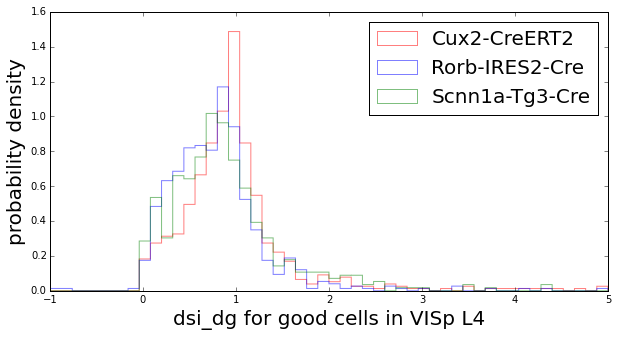

In [20]:
plot_dist('dsi_dg', bins =50, plot_range=[-1,5],log=False)

p value between Cux2 and Rorb:3.81723036814e-08
p value between Cux2 and Scnn1a:0.0805603636493
p value between Scnn1a and Rorb:0.000845133481807


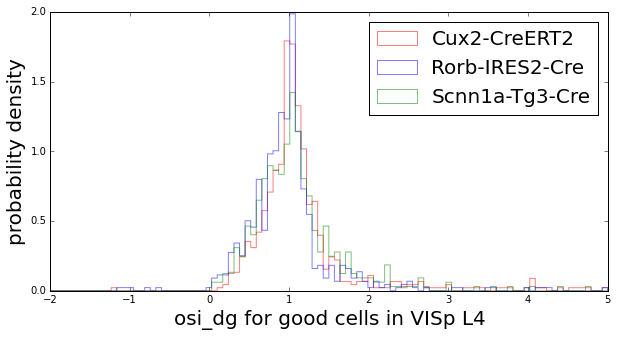

In [21]:
plot_dist('osi_dg', bins = 100, plot_range = [-2, 5],log=False)

p value between Cux2 and Rorb:0.144870151532
p value between Cux2 and Scnn1a:8.04837644033e-14
p value between Scnn1a and Rorb:2.50690830698e-19


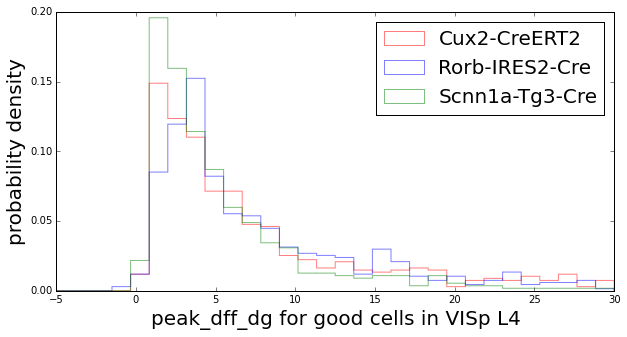

In [22]:
plot_dist('peak_dff_dg', bins =30, plot_range=[-5,30],log=False)

p value between Cux2 and Rorb:1.31919733708e-08
p value between Cux2 and Scnn1a:5.23225923939e-08
p value between Scnn1a and Rorb:0.00233481597974


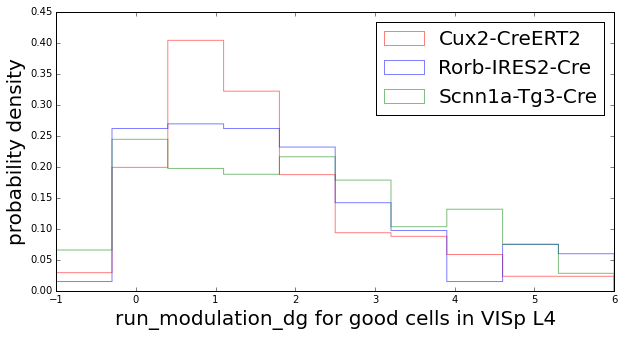

In [23]:
plot_dist('run_modulation_dg', bins =10, plot_range=[-1,6],log=False)